In [139]:
import sys
!{sys.executable} -m pip install numpy pandas imblearn matplotlib scikit-learn | grep -v 'already satisfied'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix

from sklearn.base import BaseEstimator

from sklearn.metrics import accuracy_score

from sklearn.linear_model import SGDClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV 
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


Cirrhosis is the scarring of the liver due to long-term liver damage. 

Can be due to drinking too much alcohol, a long-term liver infection like hepatitis B or C, or being obese. 

In [140]:
# Read the dataset.
train = pd.read_csv("train.csv")

# Clear the maximum number of columns to be displayed, so that all will be visible.
pd.set_option('display.max_columns', None)

display(train)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [141]:
train.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

Feature Descriptions:


ID: Unique identifier

N_Days: number of days in between the registration and the date of death, transplantation or study analysis time.

Status: status of the patient, this is our response variable. 

Drug: type of drug (either D-penicillamine or placebo)

Age: age of patient

Sex: sex of patient, either Male or Female 

Ascites: Presence of ascites - fluid in the abdomen(Y or N) 

Hepatomegaly: Prescense of hepatomegaly (Y or N)

Spiders: prescence of spiders (Y or N) 

Edema: Prescense of edema (N - no edema and no diuretic therapy, S - edema with no diuretics or edema resolved with diuretics, Y- edema despite diuretic therapy)

Bilirubin: amount of bilirubin in blood (mg/dl) a large amount can result in liver disease

Cholesterol: amount of cholesterol in blood (mg/dl) (integer)

Albumin: amount of albumin in blood - protein made by the liver (gm/dl)

Copper: amount of copper in urine, can suggest prescense of Wilson disease whihc damages the liver (ug/day) (int)

Alk_Phos: amount of alkaline phosphatase - high levels can suggest liver problems (U/liter)

SGOT: levels of SGOT in bloodstream- when liver is damaged, this liver-made protein leaks into the bloodstream (U/ml)

Tryglicerides: level of fat (lipid) in blood (int)

Platelets: level of platelets per cubic, these are cell fragments in the blood that prevent bleeding through forming blood clots (ml/1000) (int)

Prothrombin: prothombin time - time it takes for the plasma in you blood to clot (s) 

Stage: histologic stage of disease (1 - Steatosis/inflammation of liver, 2 - Scarring of liver, 3 - Cirrhosis or 4 - Liver failure) 

Checking there is no missing data:

In [142]:
na_rows = train.isna().sum(axis=0)
na_rows

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

## Histograms of Each Feature:

Text(0.5, 1.0, 'N_Days')

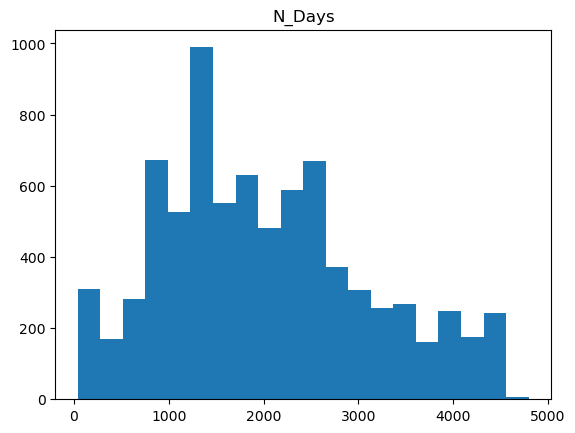

In [143]:
plt.hist(train['N_Days'], bins = 20)
plt.title('N_Days')

Text(0.5, 1.0, 'Drug')

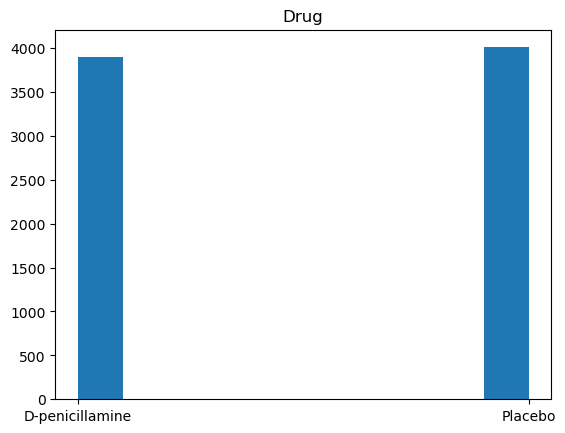

In [144]:
plt.hist(train['Drug'])
plt.title('Drug')

Text(0.5, 1.0, 'Age (in years)')

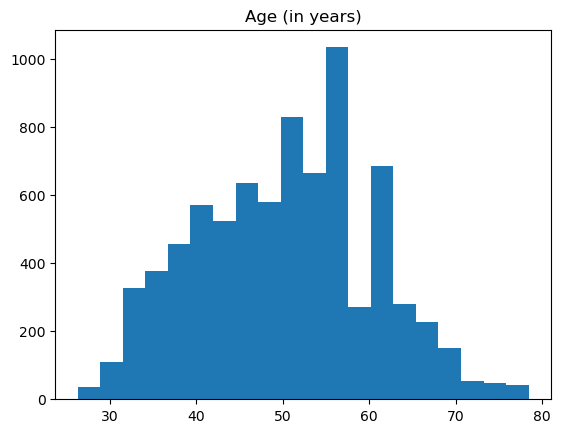

In [145]:
plt.hist(train['Age']/365.25, bins = 20)
plt.title('Age (in years)')

Text(0.5, 1.0, 'Sex')

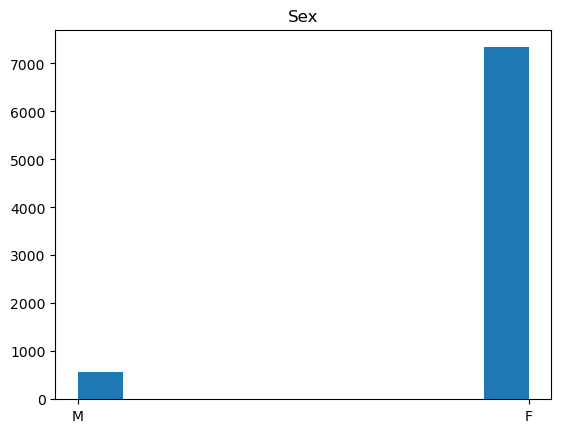

In [146]:
plt.hist(train['Sex'])
plt.title('Sex')

Text(0.5, 1.0, 'Ascites')

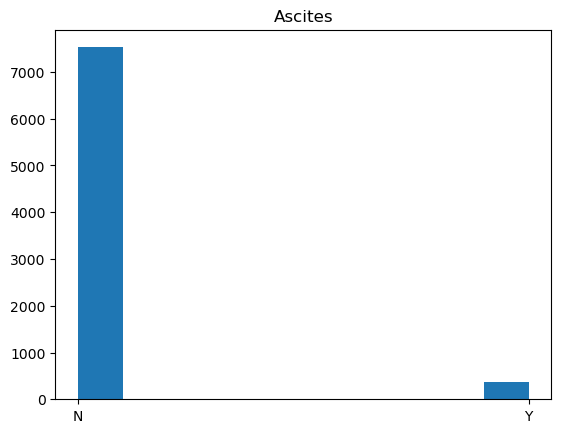

In [147]:
plt.hist(train['Ascites'])
plt.title('Ascites')

Text(0.5, 1.0, 'Hepatomegaly')

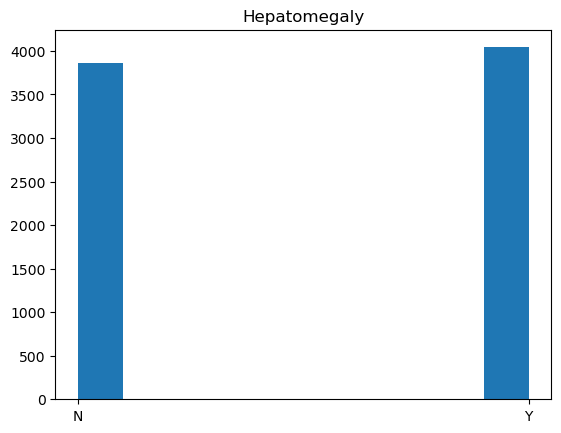

In [148]:
plt.hist(train['Hepatomegaly'])
plt.title('Hepatomegaly')

Text(0.5, 1.0, 'Spiders')

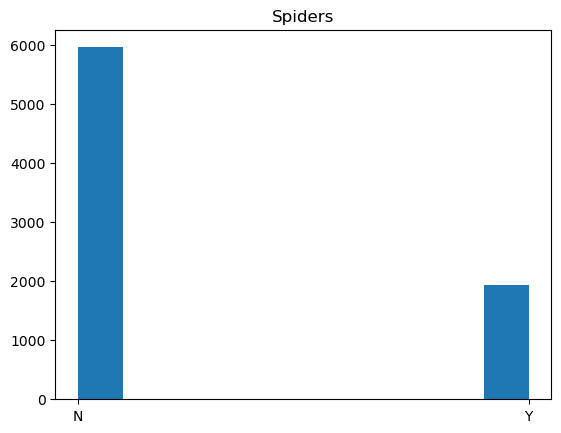

In [149]:
plt.hist(train['Spiders'])
plt.title('Spiders')

Text(0.5, 1.0, 'Edema')

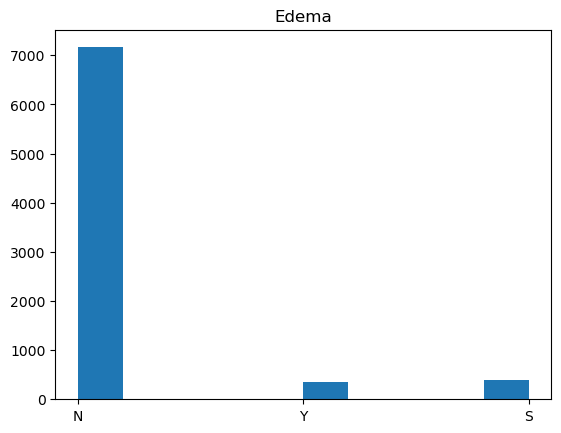

In [150]:
plt.hist(train['Edema'])
plt.title('Edema')

Text(0.5, 1.0, 'Bilirubin')

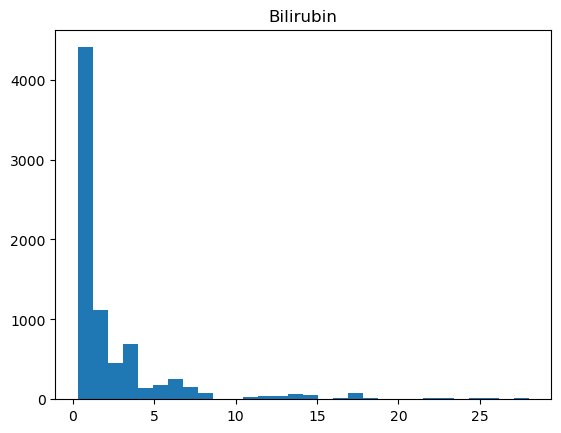

In [151]:
plt.hist(train['Bilirubin'], bins = 30)
plt.title('Bilirubin')

Text(0.5, 1.0, 'Cholesterol')

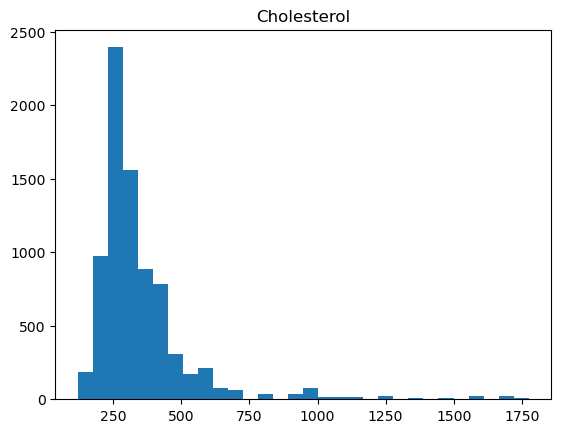

In [152]:
plt.hist(train['Cholesterol'], bins = 30)
plt.title('Cholesterol')

Text(0.5, 1.0, 'Albumin')

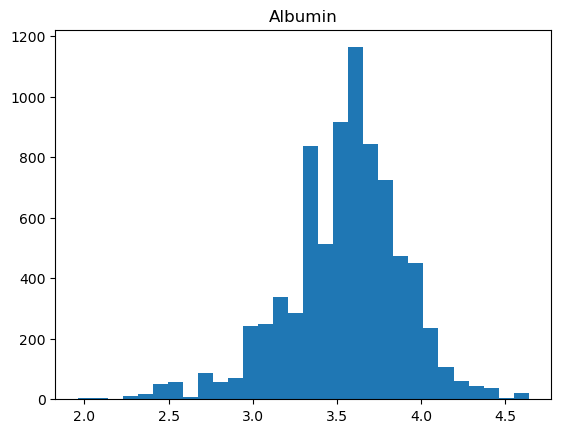

In [153]:
plt.hist(train['Albumin'], bins = 30)
plt.title('Albumin')

Text(0.5, 1.0, 'Copper')

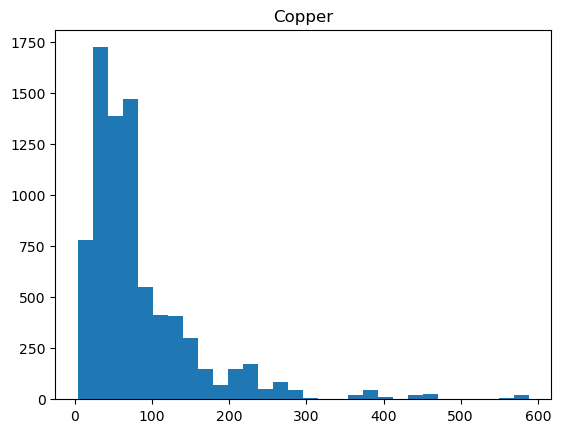

In [154]:
plt.hist(train['Copper'], bins = 30)
plt.title('Copper')

Text(0.5, 1.0, 'Alk_Phos')

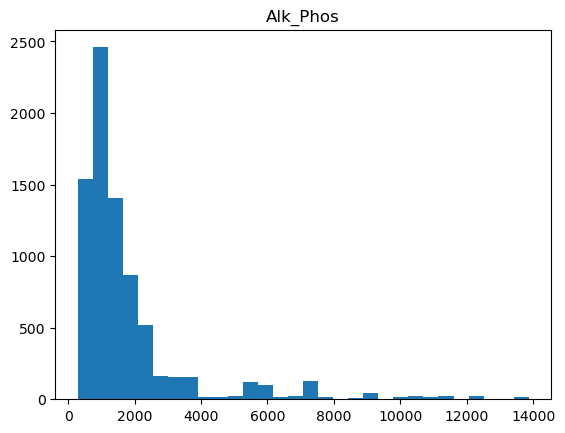

In [155]:
plt.hist(train['Alk_Phos'], bins = 30)
plt.title('Alk_Phos')

Text(0.5, 1.0, 'SGOT')

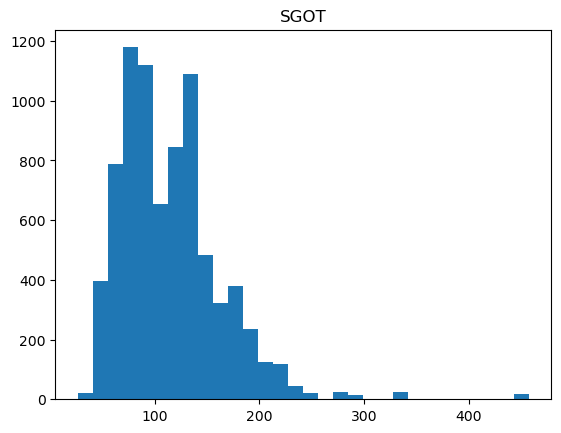

In [156]:
plt.hist(train['SGOT'], bins = 30)
plt.title('SGOT')

Text(0.5, 1.0, 'Tryglicerides')

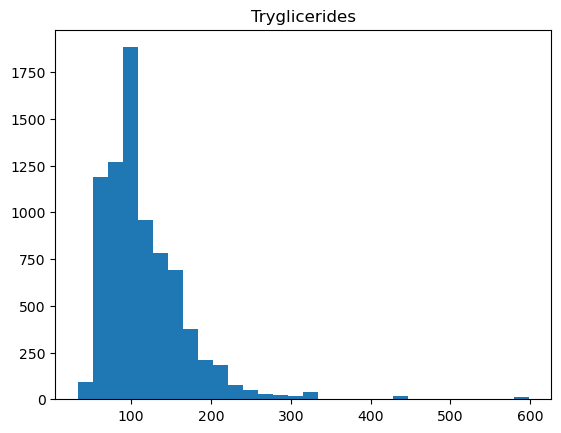

In [157]:
plt.hist(train['Tryglicerides'], bins = 30)
plt.title('Tryglicerides')

Text(0.5, 1.0, 'Platelets')

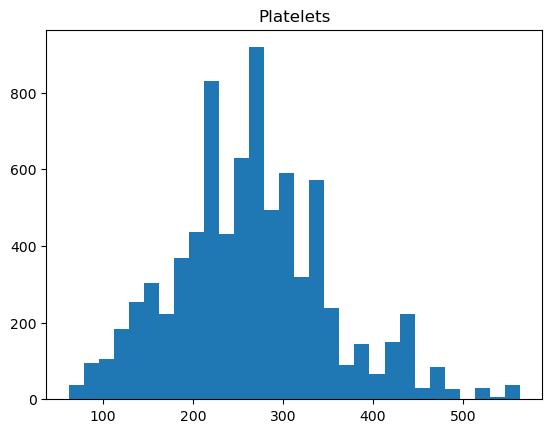

In [158]:
plt.hist(train['Platelets'], bins = 30)
plt.title('Platelets')

Text(0.5, 1.0, 'Prothrombin')

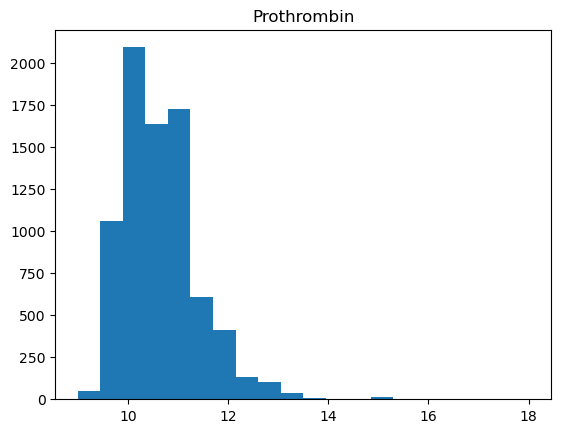

In [159]:
plt.hist(train['Prothrombin'], bins = 20)
plt.title('Prothrombin')

Text(0.5, 1.0, 'Stage')

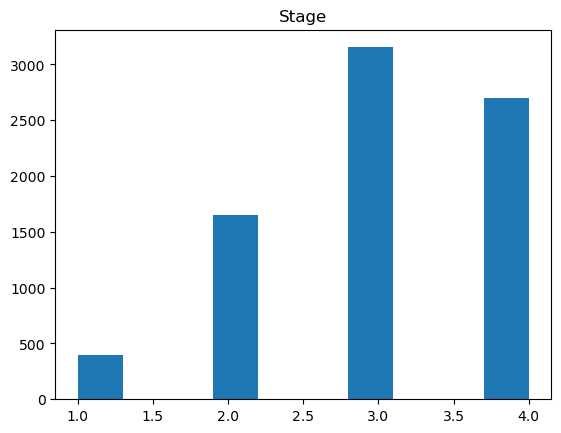

In [160]:
plt.hist(train['Stage'])
plt.title('Stage')

Text(0.5, 1.0, 'Status')

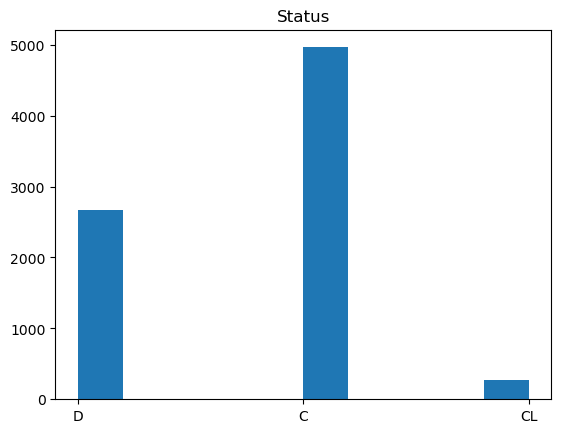

In [161]:
plt.hist(train['Status'])
plt.title('Status')

Looking at distribution of each feature in terms of the response variable 'Status'

Text(0.5, 1.0, 'Drug')

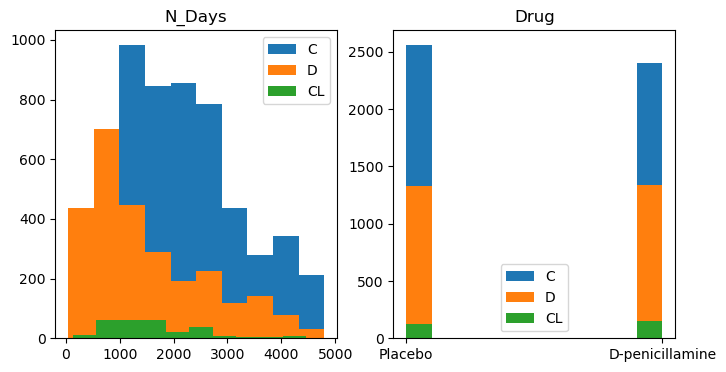

In [162]:
C = train[train['Status'] == 'C']
D = train[train['Status'] == 'D']
CL = train[train['Status'] == 'CL']

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8, 4))

ax1.hist(C['N_Days'], align='mid', label = 'C')
ax1.hist(D['N_Days'], align='mid', label = 'D')
ax1.hist(CL['N_Days'], align='mid', label = 'CL')
ax1.legend()
ax1.set_title('N_Days')
ax2.hist(C['Drug'], align='mid', label = 'C')
ax2.hist(D['Drug'], align='mid', label = 'D')
ax2.hist(CL['Drug'], align='mid', label = 'CL')
ax2.legend()
ax2.set_title('Drug')

Text(0.5, 1.0, 'Sex')

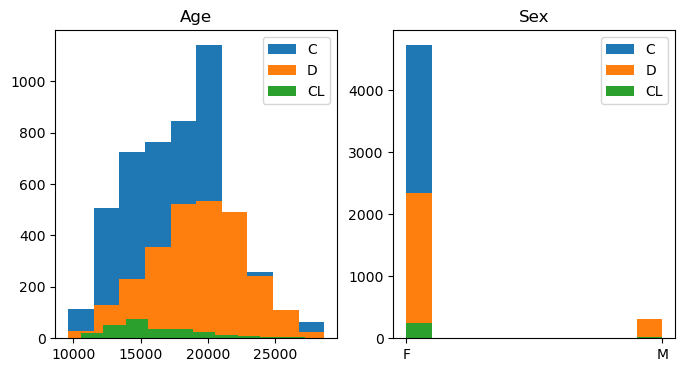

In [163]:
fig, (ax3, ax4) = plt.subplots(1,2,figsize=(8, 4))

ax3.hist(C['Age'], align='mid', label = 'C')
ax3.hist(D['Age'], align='mid', label = 'D')
ax3.hist(CL['Age'], align='mid', label = 'CL')
ax3.legend()
ax3.set_title('Age')
ax4.hist(C['Sex'], align='mid', label = 'C')
ax4.hist(D['Sex'], align='mid', label = 'D')
ax4.hist(CL['Sex'], align='mid', label = 'CL')
ax4.legend()
ax4.set_title('Sex')

Text(0.5, 1.0, 'Edema')

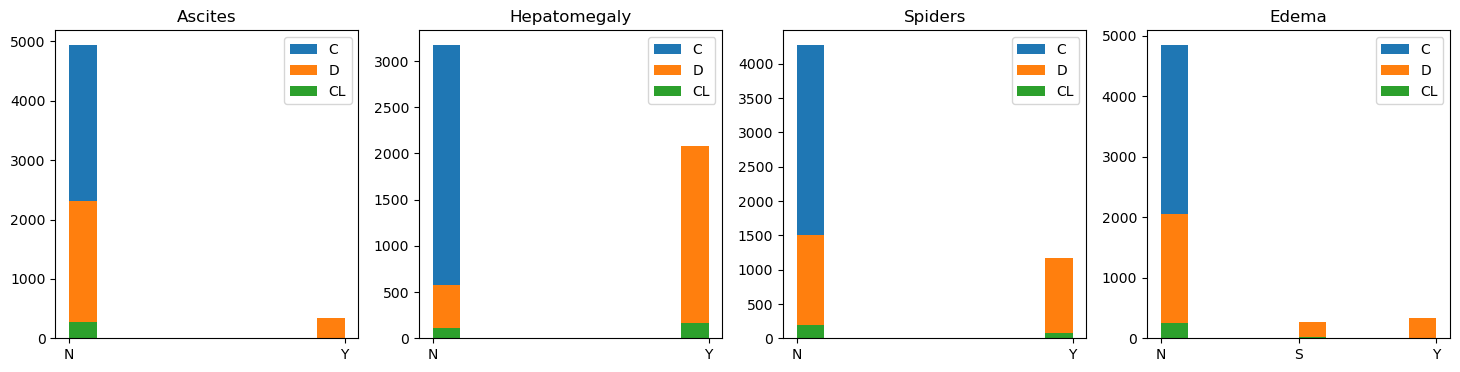

In [164]:
fig, (ax5, ax6, ax7, ax8) = plt.subplots(1,4,figsize=(18, 4))

ax5.hist(C['Ascites'], align='mid', label = 'C')
ax5.hist(D['Ascites'], align='mid', label = 'D')
ax5.hist(CL['Ascites'], align='mid', label = 'CL')
ax5.legend()
ax5.set_title('Ascites')
ax6.hist(C['Hepatomegaly'], align='mid', label = 'C')
ax6.hist(D['Hepatomegaly'], align='mid', label = 'D')
ax6.hist(CL['Hepatomegaly'], align='mid', label = 'CL')
ax6.legend()
ax6.set_title('Hepatomegaly')
ax7.hist(C['Spiders'], align='mid', label = 'C')
ax7.hist(D['Spiders'], align='mid', label = 'D')
ax7.hist(CL['Spiders'], align='mid', label = 'CL')
ax7.legend()
ax7.set_title('Spiders')
ax8.hist(C['Edema'], align='mid', label = 'C')
ax8.hist(D['Edema'], align='mid', label = 'D')
ax8.hist(CL['Edema'], align='mid', label = 'CL')
ax8.legend()
ax8.set_title('Edema')

Text(0.5, 1.0, 'Prothrombin')

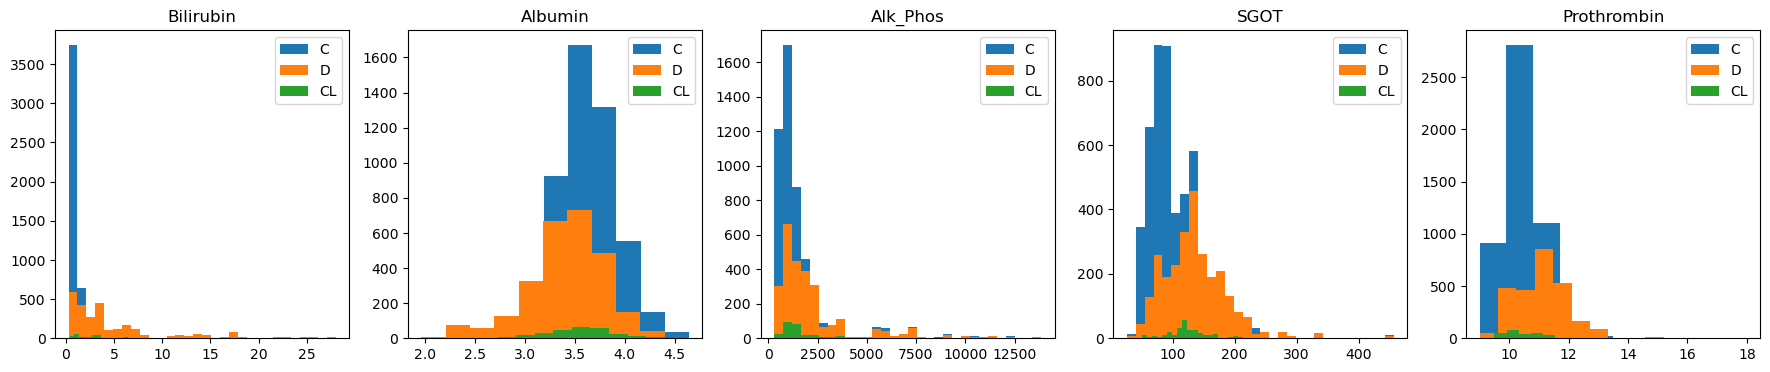

In [165]:
fig, (ax9, ax10, ax11, ax12, ax13) = plt.subplots(1,5,figsize=(22, 4))

ax9.hist(C['Bilirubin'], align='mid', label = 'C', bins = 30)
ax9.hist(D['Bilirubin'], align='mid', label = 'D',bins = 30)
ax9.hist(CL['Bilirubin'], align='mid', label = 'CL',bins = 30)
ax9.legend()
ax9.set_title('Bilirubin')
ax10.hist(C['Albumin'], align='mid', label = 'C')
ax10.hist(D['Albumin'], align='mid', label = 'D')
ax10.hist(CL['Albumin'], align='mid', label = 'CL')
ax10.legend()
ax10.set_title('Albumin')
ax11.hist(C['Alk_Phos'], align='mid', label = 'C',bins = 30)
ax11.hist(D['Alk_Phos'], align='mid', label = 'D',bins = 30)
ax11.hist(CL['Alk_Phos'], align='mid', label = 'CL',bins = 30)
ax11.legend()
ax11.set_title('Alk_Phos')
ax12.hist(C['SGOT'], align='mid', label = 'C',bins = 30)
ax12.hist(D['SGOT'], align='mid', label = 'D',bins = 30)
ax12.hist(CL['SGOT'], align='mid', label = 'CL',bins = 30)
ax12.legend()
ax12.set_title('SGOT')
ax13.hist(C['Prothrombin'], align='mid', label = 'C')
ax13.hist(D['Prothrombin'], align='mid', label = 'D')
ax13.hist(CL['Prothrombin'], align='mid', label = 'CL')
ax13.legend()
ax13.set_title('Prothrombin')

Text(0.5, 1.0, 'Platelets')

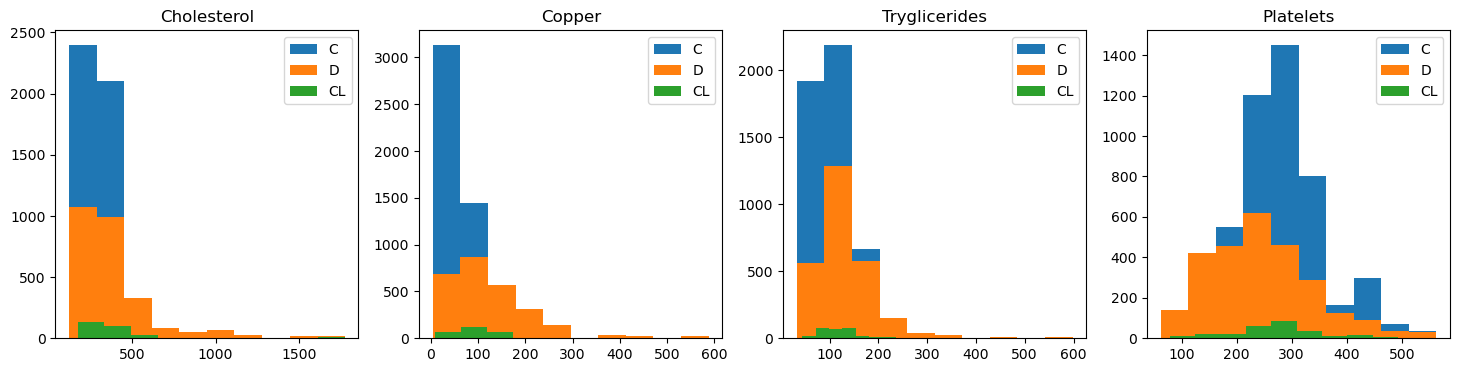

In [166]:
fig, (ax14, ax15, ax16, ax17) = plt.subplots(1,4,figsize=(18, 4))

ax14.hist(C['Cholesterol'], align='mid', label = 'C')
ax14.hist(D['Cholesterol'], align='mid', label = 'D')
ax14.hist(CL['Cholesterol'], align='mid', label = 'CL')
ax14.legend()
ax14.set_title('Cholesterol')
ax15.hist(C['Copper'], align='mid', label = 'C')
ax15.hist(D['Copper'], align='mid', label = 'D')
ax15.hist(CL['Copper'], align='mid', label = 'CL')
ax15.legend()
ax15.set_title('Copper')
ax16.hist(C['Tryglicerides'], align='mid', label = 'C')
ax16.hist(D['Tryglicerides'], align='mid', label = 'D')
ax16.hist(CL['Tryglicerides'], align='mid', label = 'CL')
ax16.legend()
ax16.set_title('Tryglicerides')
ax17.hist(C['Platelets'], align='mid', label = 'C')
ax17.hist(D['Platelets'], align='mid', label = 'D')
ax17.hist(CL['Platelets'], align='mid', label = 'CL')
ax17.legend()
ax17.set_title('Platelets')

After looking at these distributions, the features which are continuous but may need to be split into catagories are:

Copper: high high for 0-100

Tryglicerides: high between 50 - 125

Bilirubin: between 0 and 1

Alk_Phos: between 0-2000

SGOT: 2 ish peaks but generally higher between 0-150

Prothrombin: between 9.5 and 11

One method: split them into binary classification rather than continuous features. 
another: us k-fold cross validation



For response feature:

a lot less instances of CL in the response variable. therefore model maybe biased towards the other two classes.

Random Under-sampling: randomly eliminate instances from majority classes until the classes are more balanced. Good for huge training set (is ours big enough?) but can loose helpful information

Random over-sampling: increase instances of the minority class by random replication of the minority samples. Better as no information loss, but increases chnace of overfitting: use SMOTE?

SMOTE: Synthetic over-sampling, subset of minority class tajen and new synthetic data points are created based on it. better than random over sampling as no replication of training set. Not effectice on high dimensional datasets, can use MSMOTE to get over noise problem. 

Are the above methods of stratafied sampling? 

Decision tree-based algorithims preform well on imbalanced data as well as bagging and boosting techniques.

Should we try stratafied sampling and one of either bagging or boosting?


## Correlations

In [167]:
correlations = train.corr(numeric_only=True)
correlations

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,1.000000,-0.011638,-0.008351,0.007194,-0.011046,-0.019808,0.008203,-0.004393,0.020395,-0.006650,-0.007707,0.007979,-0.011391
N_Days,-0.011638,1.000000,-0.102354,-0.346434,-0.145811,0.255724,-0.284355,-0.030874,-0.240918,-0.186453,0.147626,-0.156032,-0.216820
Age,-0.008351,-0.102354,1.000000,0.099016,-0.053876,-0.114848,0.095199,0.025879,-0.020768,0.021767,-0.094822,0.141705,0.118294
Bilirubin,0.007194,-0.346434,0.099016,1.000000,0.302153,-0.303191,0.442223,0.131317,0.368653,0.315681,-0.081987,0.294325,0.200134
Cholesterol,-0.011046,-0.145811,-0.053876,0.302153,1.000000,-0.091830,0.168266,0.129131,0.326864,0.274044,0.091455,0.023761,0.037372
Albumin,-0.019808,0.255724,-0.114848,-0.303191,-0.091830,1.000000,-0.218479,-0.083582,-0.200928,-0.112304,0.141284,-0.204600,-0.233245
Copper,0.008203,-0.284355,0.095199,0.442223,0.168266,-0.218479,1.000000,0.124058,0.323226,0.290435,-0.107894,0.238771,0.182007
Alk_Phos,-0.004393,-0.030874,0.025879,0.131317,0.129131,-0.083582,0.124058,1.000000,0.128746,0.087789,0.047869,0.079517,0.061326
SGOT,0.020395,-0.240918,-0.020768,0.368653,0.326864,-0.200928,0.323226,0.128746,1.000000,0.155287,-0.042004,0.136766,0.118419
Tryglicerides,-0.006650,-0.186453,0.021767,0.315681,0.274044,-0.112304,0.290435,0.087789,0.155287,1.000000,0.006511,0.063582,0.073614


Want to look at correlations between variables and response, chnage response from D, CL, C to 0,1,2:


In [168]:
status_mapping = {'D':0, 'CL':1, 'C':2}
s_m1 = {'Y':1, 'N':0}
s_m2 = {'F':0, 'M':1}
s_m3 = {'N':0, 'S':1, 'Y':2}
s_m4 = {'D-penicillamine':1, 'Placebo':0}

train1 = train.copy() 
train1['drug_num'] = train1['Drug'].map(s_m4)
train1['sex_num'] = train1['Sex'].map(s_m2)
train1['Edema_num'] = train1['Edema'].map(s_m3)
train1['Hepatomegaly_num'] = train1['Hepatomegaly'].map(s_m1)
train1['ascites_num'] = train1['Ascites'].map(s_m1)
train1['spiders_num'] = train1['Spiders'].map(s_m1)
train1['status_num'] = train1['Status'].map(status_mapping)
#this is okay to do for 2 class features i think because if i swap the numbers, this just swaps the sign of the correlation, not the magnitude whihc is what were looking at 
#for the response varibale, swapping the mapping numbers does affect the magnitude: look at all 3:

In [169]:
correlations = train1.corr(numeric_only=True)
correlations

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,drug_num,sex_num,Edema_num,Hepatomegaly_num,ascites_num,spiders_num,status_num
id,1.000000,-0.011638,-0.008351,0.007194,-0.011046,-0.019808,0.008203,-0.004393,0.020395,-0.006650,-0.007707,0.007979,-0.011391,0.007624,-0.008090,0.004054,0.007162,0.007972,0.009339,-0.001073
N_Days,-0.011638,1.000000,-0.102354,-0.346434,-0.145811,0.255724,-0.284355,-0.030874,-0.240918,-0.186453,0.147626,-0.156032,-0.216820,-0.004778,-0.062705,-0.271036,-0.284780,-0.258936,-0.211302,0.343450
Age,-0.008351,-0.102354,1.000000,0.099016,-0.053876,-0.114848,0.095199,0.025879,-0.020768,0.021767,-0.094822,0.141705,0.118294,0.092069,0.112422,0.146760,0.108993,0.156412,0.056427,-0.168331
Bilirubin,0.007194,-0.346434,0.099016,1.000000,0.302153,-0.303191,0.442223,0.131317,0.368653,0.315681,-0.081987,0.294325,0.200134,-0.037292,0.036848,0.347667,0.299012,0.384096,0.255896,-0.429480
Cholesterol,-0.011046,-0.145811,-0.053876,0.302153,1.000000,-0.091830,0.168266,0.129131,0.326864,0.274044,0.091455,0.023761,0.037372,0.007369,0.024698,-0.040467,0.139797,-0.043590,0.044125,-0.184869
Albumin,-0.019808,0.255724,-0.114848,-0.303191,-0.091830,1.000000,-0.218479,-0.083582,-0.200928,-0.112304,0.141284,-0.204600,-0.233245,-0.030078,-0.023141,-0.321785,-0.267502,-0.329232,-0.225969,0.296121
Copper,0.008203,-0.284355,0.095199,0.442223,0.168266,-0.218479,1.000000,0.124058,0.323226,0.290435,-0.107894,0.238771,0.182007,-0.002482,0.155672,0.264495,0.272353,0.277369,0.258502,-0.386015
Alk_Phos,-0.004393,-0.030874,0.025879,0.131317,0.129131,-0.083582,0.124058,1.000000,0.128746,0.087789,0.047869,0.079517,0.061326,0.001542,0.006088,0.066479,0.127445,0.057835,0.071193,-0.154623
SGOT,0.020395,-0.240918,-0.020768,0.368653,0.326864,-0.200928,0.323226,0.128746,1.000000,0.155287,-0.042004,0.136766,0.118419,-0.040951,0.061081,0.119928,0.206269,0.121282,0.146304,-0.313242
Tryglicerides,-0.006650,-0.186453,0.021767,0.315681,0.274044,-0.112304,0.290435,0.087789,0.155287,1.000000,0.006511,0.063582,0.073614,-0.058186,0.071251,0.091715,0.161091,0.134927,0.082273,-0.197093


In [170]:
status_mapping2 = {'D':1, 'CL':2, 'C':0}
status_mapping3 = {'D':2, 'CL':0, 'C':1}
train1['status_num2'] = train1['Status'].map(status_mapping2)
train1['status_num3'] = train1['Status'].map(status_mapping3)

In [171]:
correlations = train1.corr(numeric_only=True)
correlations

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,drug_num,sex_num,Edema_num,Hepatomegaly_num,ascites_num,spiders_num,status_num,status_num2,status_num3
id,1.000000,-0.011638,-0.008351,0.007194,-0.011046,-0.019808,0.008203,-0.004393,0.020395,-0.006650,-0.007707,0.007979,-0.011391,0.007624,-0.008090,0.004054,0.007162,0.007972,0.009339,-0.001073,0.007928,-0.006445
N_Days,-0.011638,1.000000,-0.102354,-0.346434,-0.145811,0.255724,-0.284355,-0.030874,-0.240918,-0.186453,0.147626,-0.156032,-0.216820,-0.004778,-0.062705,-0.271036,-0.284780,-0.258936,-0.211302,0.343450,-0.324947,-0.266431
Age,-0.008351,-0.102354,1.000000,0.099016,-0.053876,-0.114848,0.095199,0.025879,-0.020768,0.021767,-0.094822,0.141705,0.118294,0.092069,0.112422,0.146760,0.108993,0.156412,0.056427,-0.168331,0.087158,0.206489
Bilirubin,0.007194,-0.346434,0.099016,1.000000,0.302153,-0.303191,0.442223,0.131317,0.368653,0.315681,-0.081987,0.294325,0.200134,-0.037292,0.036848,0.347667,0.299012,0.384096,0.255896,-0.429480,0.368991,0.372490
Cholesterol,-0.011046,-0.145811,-0.053876,0.302153,1.000000,-0.091830,0.168266,0.129131,0.326864,0.274044,0.091455,0.023761,0.037372,0.007369,0.024698,-0.040467,0.139797,-0.043590,0.044125,-0.184869,0.181565,0.136405
Albumin,-0.019808,0.255724,-0.114848,-0.303191,-0.091830,1.000000,-0.218479,-0.083582,-0.200928,-0.112304,0.141284,-0.204600,-0.233245,-0.030078,-0.023141,-0.321785,-0.267502,-0.329232,-0.225969,0.296121,-0.249432,-0.262071
Copper,0.008203,-0.284355,0.095199,0.442223,0.168266,-0.218479,1.000000,0.124058,0.323226,0.290435,-0.107894,0.238771,0.182007,-0.002482,0.155672,0.264495,0.272353,0.277369,0.258502,-0.386015,0.348268,0.317295
Alk_Phos,-0.004393,-0.030874,0.025879,0.131317,0.129131,-0.083582,0.124058,1.000000,0.128746,0.087789,0.047869,0.079517,0.061326,0.001542,0.006088,0.066479,0.127445,0.057835,0.071193,-0.154623,0.130424,0.136654
SGOT,0.020395,-0.240918,-0.020768,0.368653,0.326864,-0.200928,0.323226,0.128746,1.000000,0.155287,-0.042004,0.136766,0.118419,-0.040951,0.061081,0.119928,0.206269,0.121282,0.146304,-0.313242,0.288217,0.251576
Tryglicerides,-0.006650,-0.186453,0.021767,0.315681,0.274044,-0.112304,0.290435,0.087789,0.155287,1.000000,0.006511,0.063582,0.073614,-0.058186,0.071251,0.091715,0.161091,0.134927,0.082273,-0.197093,0.178713,0.161066


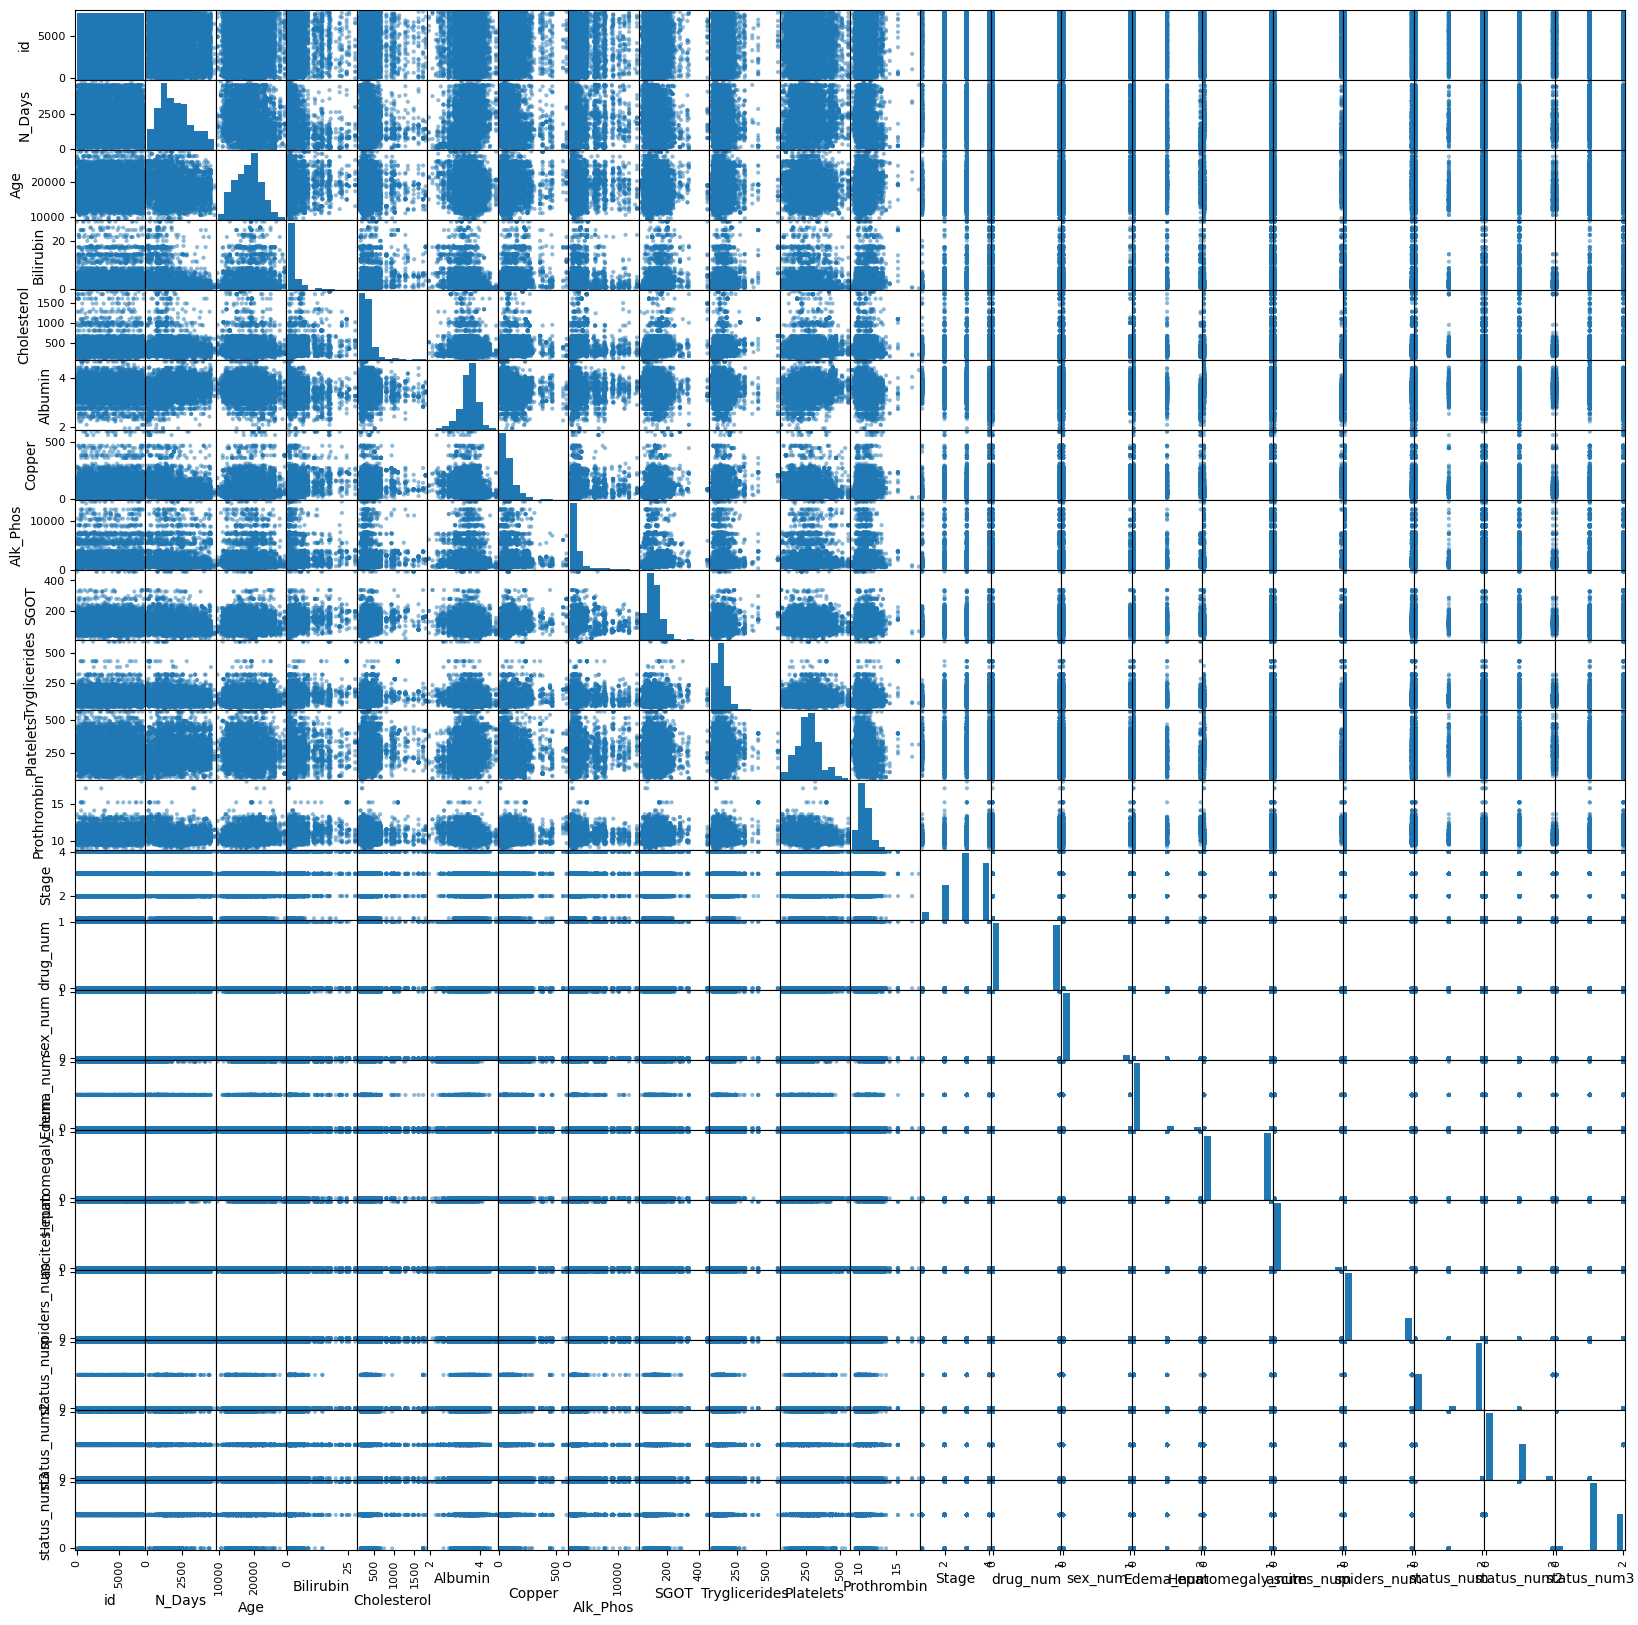

In [172]:
pd.plotting.scatter_matrix(train1, figsize=(20,20))
#looking at distribution matrix:

plt.show()

Looking at what feature's physical impact on the response may be:

From https://www.niddk.nih.gov/health-information/liver-disease/cirrhosis/diagnosis
it says the most important blood tests to look at are Bilirubun, Albumin and Alk_Phos. We can see here that these do seem to have some sort of correlation with the status response. 

As well as this, https://www.hepatitis.va.gov/cirrhosis/background/how-to-diagnose.asp says that a physical sumptom of Cirrhosis is the prescense of Ascetites, so this could be an important feature to consider.
It also suggests that these lab results could suggest Cirrhosis:
Platelet count < 180,000;
Albumin < 3.8 mg/dL;
Bilirubin > 1.5 mg/dL (very non-specific);
AST>ALT

Copper built up can lead to hepatitus, whihc is what can leave people suseptible to Cirrhosis, however, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5655285/#:~:text=In%20a%20healthy%20population%2C%20relatively,zinc%20levels%20under%20this%20condition.
says that Bilirubin can be correlated with copper in the bloodstream, and we can see this in our data too, so may not need to include both. 

SGOT: 

https://www.hepatitis.va.gov/hcv/patient/diagnosis/labtests-AST.asp says that SGOT may not be the most helpful feature for diagnosing cirrhosis, patients can have sever cirrhosis or liver damage and still have normal SGOT levels. 

Cholesterol:

https://www.sciencedirect.com/science/article/pii/S1665268119313420 says they found that including cholesterol levels in thier models resulted in a 4% higher accuracy of their model, and including triglycerides did no affect thier model in any meaningful way. 

## Number of Unique Values

In [173]:
train.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

We can see that the only feature which is a unique identifier is ID number, which makes sense as it the identification number. 

## Trying method 1 to take out values from response with a high proportion of data 

first work out what proportion of data is in each response catagory:


In [174]:
print("response C:", len(C)/len(train))
print("response CL:", len(CL)/len(train))
print("response D:", len(D)/len(train))

response C: 0.6280834914611005
response CL: 0.03478810879190386
response D: 0.3371283997469956


We can see the response C has a very large proportion, and response CL has a very small proportion. Lets try and balance them by removing C and D response values at random:

In [175]:
num_C = int(0.95 * len(C))
num_D = int(0.9*len(D))

rows_to_remove_C = C.sample(n=num_C, random_state=56)
rows_to_remove_D = D.sample(n=num_D, random_state=57)
# Remove selected rows from the dataset
tr = train.copy()

tr = tr.drop(rows_to_remove_C.index)
tr = tr.drop(rows_to_remove_D.index)



In [176]:
Cnew = tr[tr['Status'] == "C"]
Dnew = tr[tr['Status'] == "D"]
CLnew = tr[tr['Status'] == "CL"]

print("new response C:", len(Cnew)/len(tr))
print("new response CL:", len(CLnew)/len(tr))
print("new response D:", len(Dnew)/len(tr))

new response C: 0.3147914032869785
new response CL: 0.347661188369153
new response D: 0.33754740834386854


In [177]:
print(len(tr))

791


The proportion of the repsonse data is now much more equal, howveer this leads to a huge reduction in the dataset 

May need to see if there is another way:


SMOTE: Synthetic over-sampling, subset of minority class tajen and new synthetic data points are created based on it. better than random over sampling as no replication of training set. Not effectice on high dimensional datasets, can use MSMOTE to get over noise problem

Maybe try MSMOTE - need to encode first

## Encoding and Scaling 

In [178]:
display(tr1)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,0
0,0,-0.942430,D-penicillamine,0.858448,M,N,N,N,N,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,3.0,D,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
1,1,0.497025,Placebo,0.234760,F,N,N,N,N,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,3.0,C,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
2,2,1.277529,Placebo,-1.262634,F,N,Y,Y,Y,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,4.0,D,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0
3,3,0.498852,Placebo,0.023603,F,N,N,N,N,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,3.0,C,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,4,-1.135271,Placebo,-0.466107,F,N,Y,N,N,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,4.0,C,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,-0.789802,D-penicillamine,-0.416919,F,N,N,N,N,-0.470657,-0.212738,0.033735,-0.604825,-0.098625,-0.728759,2.068644,0.900652,-0.933192,2.0,C,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7901,7901,-0.491858,Placebo,-0.364741,F,N,Y,N,N,-0.444429,-0.463548,-0.341826,-0.288596,-0.197909,0.561521,-0.710875,0.134588,-0.805263,4.0,C,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0
7902,7902,-0.415087,D-penicillamine,2.038155,F,N,N,Y,S,-0.155921,-0.642698,-1.035169,-0.433534,-0.464242,-0.919380,-1.015479,-0.745814,2.648812,2.0,D,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7903,7903,1.420103,D-penicillamine,1.246520,M,N,Y,N,N,-0.496885,-0.524971,-2.306298,-0.683882,-0.427470,-1.173542,0.050637,-0.505705,-0.037691,4.0,D,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0


In [179]:
tr1.dtypes

id                         int64
N_Days                   float64
Drug                      object
Age                      float64
Sex                       object
Ascites                   object
Hepatomegaly              object
Spiders                   object
Edema                     object
Bilirubin                float64
Cholesterol              float64
Albumin                  float64
Copper                   float64
Alk_Phos                 float64
SGOT                     float64
Tryglicerides            float64
Platelets                float64
Prothrombin              float64
Stage                   category
Status                    object
Drug_D-penicillamine     float64
Drug_Placebo             float64
Sex_F                    float64
Sex_M                    float64
Ascites_N                float64
Ascites_Y                float64
Hepatomegaly_N           float64
Hepatomegaly_Y           float64
Spiders_N                float64
Spiders_Y                float64
Edema_N   

In [180]:
tr1 = train.copy()
ordinal_encoder = OrdinalEncoder() 
#turn stage into a catagorical feature 
tr1["Stage"] = pd.Categorical(tr1["Stage"])
#stage is the only ordered catagory 
ordered_catagories = ["Stage"]
ch_train_categorical_encoded = pd.DataFrame(ordinal_encoder.fit_transform(tr1[ordered_catagories]))


#one hot encode the others
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.set_output(transform="pandas")
random_catagories = ["Drug", "Sex", "Ascites","Hepatomegaly", "Spiders","Edema" ]
data_categorical_encoded = pd.DataFrame(one_hot_encoder.fit_transform(tr1[random_catagories]))

tr1 = pd.concat((tr1, data_categorical_encoded,ch_train_categorical_encoded ), axis=1)


In [181]:
scaler = StandardScaler()

numerical_attributes = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin"]

data_num = scaler.fit_transform(tr1[numerical_attributes])

# convert to pandas data frame object.
data_num = pd.DataFrame(
  data_num, 
  columns=numerical_attributes, 
  index=tr1.index
)

tr1[numerical_attributes] = data_num


In [182]:

tr_y = tr1["Status"]
#remove uneccessary features after encoding 
tr_X = tr1.drop(columns = ["Status", "id","Drug", "Sex", "Ascites","Hepatomegaly", "Spiders","Edema", "Stage" ])
tr_X.columns = tr_X.columns.astype(str)
display(tr_X)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,0
0,-0.942430,0.858448,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
1,0.497025,0.234760,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
2,1.277529,-1.262634,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0
3,0.498852,0.023603,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
4,-1.135271,-0.466107,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,-0.789802,-0.416919,-0.470657,-0.212738,0.033735,-0.604825,-0.098625,-0.728759,2.068644,0.900652,-0.933192,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7901,-0.491858,-0.364741,-0.444429,-0.463548,-0.341826,-0.288596,-0.197909,0.561521,-0.710875,0.134588,-0.805263,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0
7902,-0.415087,2.038155,-0.155921,-0.642698,-1.035169,-0.433534,-0.464242,-0.919380,-1.015479,-0.745814,2.648812,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7903,1.420103,1.246520,-0.496885,-0.524971,-2.306298,-0.683882,-0.427470,-1.173542,0.050637,-0.505705,-0.037691,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0


In [183]:
correlations = tr1.corr(numeric_only=True)
correlations

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,0
id,1.000000,-0.011638,-0.008351,0.007194,-0.011046,-0.019808,0.008203,-0.004393,0.020395,-0.006650,-0.007707,0.007979,0.007624,-0.007624,0.008090,-0.008090,-0.007972,0.007972,-0.007162,0.007162,-0.009339,0.009339,-0.000551,-0.006937,0.008220,-0.011391
N_Days,-0.011638,1.000000,-0.102354,-0.346434,-0.145811,0.255724,-0.284355,-0.030874,-0.240918,-0.186453,0.147626,-0.156032,-0.004778,0.004778,0.062705,-0.062705,0.258936,-0.258936,0.284780,-0.284780,0.211302,-0.211302,0.248021,-0.099596,-0.247755,-0.216820
Age,-0.008351,-0.102354,1.000000,0.099016,-0.053876,-0.114848,0.095199,0.025879,-0.020768,0.021767,-0.094822,0.141705,0.092069,-0.092069,-0.112422,0.112422,-0.156412,0.156412,-0.108993,0.108993,-0.056427,0.056427,-0.143403,0.078219,0.121140,0.118294
Bilirubin,0.007194,-0.346434,0.099016,1.000000,0.302153,-0.303191,0.442223,0.131317,0.368653,0.315681,-0.081987,0.294325,-0.037292,0.037292,-0.036848,0.036848,-0.384096,0.384096,-0.299012,0.299012,-0.255896,0.255896,-0.321936,0.137871,0.312383,0.200134
Cholesterol,-0.011046,-0.145811,-0.053876,0.302153,1.000000,-0.091830,0.168266,0.129131,0.326864,0.274044,0.091455,0.023761,0.007369,-0.007369,-0.024698,0.024698,0.043590,-0.043590,-0.139797,0.139797,-0.044125,0.044125,0.032248,-0.002112,-0.043826,0.037372
Albumin,-0.019808,0.255724,-0.114848,-0.303191,-0.091830,1.000000,-0.218479,-0.083582,-0.200928,-0.112304,0.141284,-0.204600,-0.030078,0.030078,0.023141,-0.023141,0.329232,-0.329232,0.267502,-0.267502,0.225969,-0.225969,0.281161,-0.082767,-0.313153,-0.233245
Copper,0.008203,-0.284355,0.095199,0.442223,0.168266,-0.218479,1.000000,0.124058,0.323226,0.290435,-0.107894,0.238771,-0.002482,0.002482,-0.155672,0.155672,-0.277369,0.277369,-0.272353,0.272353,-0.258502,0.258502,-0.248666,0.114882,0.232298,0.182007
Alk_Phos,-0.004393,-0.030874,0.025879,0.131317,0.129131,-0.083582,0.124058,1.000000,0.128746,0.087789,0.047869,0.079517,0.001542,-0.001542,-0.006088,0.006088,-0.057835,0.057835,-0.127445,0.127445,-0.071193,0.071193,-0.067748,0.042873,0.050887,0.061326
SGOT,0.020395,-0.240918,-0.020768,0.368653,0.326864,-0.200928,0.323226,0.128746,1.000000,0.155287,-0.042004,0.136766,-0.040951,0.040951,-0.061081,0.061081,-0.121282,0.121282,-0.206269,0.206269,-0.146304,0.146304,-0.114973,0.058019,0.102152,0.118419
Tryglicerides,-0.006650,-0.186453,0.021767,0.315681,0.274044,-0.112304,0.290435,0.087789,0.155287,1.000000,0.006511,0.063582,-0.058186,0.058186,-0.071251,0.071251,-0.134927,0.134927,-0.161091,0.161091,-0.082273,0.082273,-0.088846,0.046823,0.076807,0.073614


## SMOTE

In [184]:
# using data from Encoding and Scaling above:
msmote = SMOTE()

tr_X_new, tr_y_new = msmote.fit_resample(tr_X, tr_y)

Get proportions:

In [185]:

Cnew = tr_y_new[tr_y_new == "C"]
Dnew = tr_y_new[tr_y_new == "D"]
CLnew = tr_y_new[tr_y_new == "CL"]

print("new response C:", len(Cnew)/len(tr_X_new))
print("new response CL:", len(CLnew)/len(tr_X_new))
print("new response D:", len(Dnew)/len(tr_X_new))

new response C: 0.3333333333333333
new response CL: 0.3333333333333333
new response D: 0.3333333333333333


In [186]:
np.shape(tr_X_new)

(14895, 25)

We have a much larger dataset than for the previous method, this should hopefully be better, but not sure as the extra data (which is as big as if not even bigger than the original dataset) is synthetic so could introduce bias. 

Can try another SMOTE method called SMOTENC, this is designed to be used with caragortical and numerical features:


In [187]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state=42, categorical_features=["Drug", "Sex", "Ascites","Hepatomegaly", "Spiders","Edema","Stage"])

In [188]:
tr2 = train.copy()
tr2_y = tr2["Status"]
tr2_X = tr2.drop(columns = ["Status"])

In [189]:
X_res, y_res = sm.fit_resample(tr2_X, tr2_y)

In [190]:
Cnew2 = y_res[y_res == "C"]
Dnew2 = y_res[y_res == "D"]
CLnew2 = y_res[y_res == "CL"]

print("new response C:", len(Cnew2)/len(X_res))
print("new response CL:", len(CLnew2)/len(X_res))
print("new response D:", len(Dnew2)/len(X_res))

new response C: 0.3333333333333333
new response CL: 0.3333333333333333
new response D: 0.3333333333333333


Only problem with this is that it can only use one encoder inside the SMOTENC, so uses onehot for all catagorical features, however, we wanted to use ordinal encoder for the feature Status. -> Just use SMOTE  

In [191]:
np.shape(X_res)

(14895, 19)

Decision is to have the two ways of balancing the response variable to be random under sampling and SMOTE. 
Try both ways and compare to none, then see which is better (good to use k-fold cross validation)

## Feature Engineering

ALso want to see if changing some of the imbalanced features into binary catagories makes a difference 
therefore will have 6 final data sets. 

AlPhos: split at 2000 
Bilirubin: split at 1.5
Copper: split at 100 

Give each instance a 0 if not at peak, and 1 if it is

In [192]:
train3 = train.copy() 
train3['peak_Bilirubin'] = (train3["Bilirubin"] < 2.5).astype(int)
train3['peak_Alk_Phos'] = (train3["Alk_Phos"] < 2000).astype(int)
train3['peak_Copper'] = (train3["Copper"] < 100).astype(int)



In [193]:
bili_peak = train3[train3['peak_Bilirubin']==1]
bili_npeak = train3[train3['peak_Bilirubin']==0]

alk_peak = train3[train3['peak_Alk_Phos']==1]
alk_npeak = train3[train3['peak_Alk_Phos']==0]

copper_peak = train3[train3['peak_Copper']==1]
copper_npeak = train3[train3['peak_Copper']==0]

In [194]:
print('proportion of instances in peak of each feature:')
print('Bilirubin:', len(bili_peak)/((len(bili_peak)+len(bili_npeak))))
print('Alk_Phos:', len(alk_peak)/((len(alk_peak)+len(alk_npeak))))
print('Copper:', len(copper_peak)/((len(copper_peak)+len(copper_npeak))))


proportion of instances in peak of each feature:
Bilirubin: 0.7265022137887414
Alk_Phos: 0.7801391524351676
Copper: 0.7444655281467426


I moved the peak cut off values until these values were around the 75% mark, as this seemed a reasonable cut off. 

## Create Pipelines:

Create one pipeline that does tranform some numerical features into catagorical, and one that doesn't:


In [195]:

#feature engineer
def transformer_categorical(X):
    X['peak_Bilirubin'] = (X["Bilirubin"] < 2.5).astype(int)
    X['peak_Alk_Phos'] = (X["Alk_Phos"] < 2000).astype(int)
    X['peak_Copper'] = (X["Copper"] < 100).astype(int)
    # drop uneeded features
    X = X.drop(columns=['Bilirubin',"Alk_Phos","Copper"])

    return X


def clean_and_prep_binary(X, keep,category):

    # drop columns
    X = X[keep]
    
    # call feature engineer 
    X = transformer_categorical(X)

    #convert some columns into catagories 
    for catcol in category:
        X[catcol] = pd.Categorical(X[catcol])

   
    return X 

columns_to_keep = ["Drug", "Sex", "Ascites","Hepatomegaly", "Spiders","Edema", "Stage",'Copper', 'Alk_Phos','Bilirubin',"N_Days","Age","Cholesterol","Albumin","SGOT","Tryglicerides","Platelets","Prothrombin","Status"]
category_columns_binary = ["Drug", "Sex", "Ascites","Hepatomegaly", "Spiders","Edema", "Stage",'peak_Copper', 'peak_Alk_Phos','peak_Bilirubin' ]
ordered_catagories_binary = ["Stage", 'peak_Copper', 'peak_Alk_Phos','peak_Bilirubin']
numerical_attributes_binary = ["N_Days","Age","Cholesterol","Albumin","SGOT","Tryglicerides","Platelets","Prothrombin"]

random_catagories = ["Drug", "Sex", "Ascites","Hepatomegaly", "Spiders","Edema" ]

#call clean and prep function on train and test set
cleaned_data2 = clean_and_prep_binary(train, columns_to_keep,category_columns_binary)


# define pipeline
full_pipeline_binary = ColumnTransformer([
    ("numerical", StandardScaler(), numerical_attributes_binary),
    ("categorical_ordinal", OrdinalEncoder(), ordered_catagories_binary),
    ("categorical_nominal", OneHotEncoder(sparse_output=False), random_catagories)
], remainder='passthrough') #using remainder=passthrough to allow features that werent encoded or scaled to be included
full_pipeline_binary.set_output(transform="pandas")

#call pipeline on cleaned data 
data2 = full_pipeline_binary.fit_transform(cleaned_data2)



In [196]:
def clean_and_prep_num(X, keep,category):

    # drop columns
    X = X[keep]
    
    # no feature engineering 

    #convert some columns into catagories 
    for catcol in category:
        X.loc[:, catcol] = pd.Categorical(X[catcol])

   
    return X 

columns_to_keep = ["Drug", "Sex", "Ascites","Hepatomegaly", "Spiders","Edema", "Stage",'Copper', 'Alk_Phos','Bilirubin',"N_Days","Age","Cholesterol","Albumin","SGOT","Tryglicerides","Platelets","Prothrombin","Status"]
category_columns_num = ["Drug", "Sex", "Ascites","Hepatomegaly", "Spiders","Edema", "Stage"]
ordered_catagories_num = ["Stage"]
numerical_attributes_num = ["N_Days","Age","Cholesterol","Albumin","SGOT","Tryglicerides","Platelets","Prothrombin",'Copper', 'Alk_Phos','Bilirubin']

random_catagories = ["Drug", "Sex", "Ascites","Hepatomegaly", "Spiders","Edema" ]

#call clean and prep function on train and test set
cleaned_data1 = clean_and_prep_num(train, columns_to_keep,category_columns_num)


# define pipeline
full_pipeline_num = ColumnTransformer([
    ("numerical", StandardScaler(), numerical_attributes_num),
    ("categorical_ordinal", OrdinalEncoder(), ordered_catagories_num),
    ("categorical_nominal", OneHotEncoder(sparse_output=False), random_catagories)
], remainder='passthrough') #using remainder=passthrough to allow features that werent encoded or scaled to be included
full_pipeline_num.set_output(transform="pandas")

#call pipeline on cleaned data 
data1 = full_pipeline_num.fit_transform(cleaned_data1)

/tmp/ipykernel_94/2752939369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, catcol] = pd.Categorical(X[catcol])
/tmp/ipykernel_94/2752939369.py:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, catcol] = pd.Categorical(X[catcol])
/tmp/ipykernel_94/2752939369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [197]:
display(data1)

,numerical__N_Days,numerical__Age,numerical__Cholesterol,numerical__Albumin,numerical__SGOT,numerical__Tryglicerides,numerical__Platelets,numerical__Prothrombin,numerical__Copper,numerical__Alk_Phos,numerical__Bilirubin,categorical_ordinal__Stage,categorical_nominal__Drug_D-penicillamine,categorical_nominal__Drug_Placebo,categorical_nominal__Sex_F,categorical_nominal__Sex_M,categorical_nominal__Ascites_N,categorical_nominal__Ascites_Y,categorical_nominal__Hepatomegaly_N,categorical_nominal__Hepatomegaly_Y,categorical_nominal__Spiders_N,categorical_nominal__Spiders_Y,categorical_nominal__Edema_N,categorical_nominal__Edema_S,categorical_nominal__Edema_Y,remainder__Status
0,-0.942430,0.858448,-0.176908,-0.572940,1.336304,-0.996442,1.472341,-1.189049,1.160785,-0.113334,-0.077237,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,D
1,0.497025,0.234760,0.068784,-0.024043,0.414968,-0.520497,1.095026,0.474024,-0.275420,-0.197909,-0.444429,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,C
2,1.277529,-1.262634,-0.263923,0.004846,0.097266,-1.243933,-0.757248,1.369525,0.620561,-0.413812,0.185043,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,D
3,0.498852,0.023603,-0.484022,-0.139601,-0.887610,-0.368194,0.043117,0.090238,-0.341301,-0.086017,-0.523113,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,C
4,-1.135271,-0.466107,-0.023351,0.293739,0.224347,-0.368194,0.374697,-0.037691,-0.275420,-0.333965,-0.391973,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,-0.789802,-0.416919,-0.212738,0.033735,-0.728759,2.068644,0.900652,-0.933192,-0.604825,-0.098625,-0.470657,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,C
7901,-0.491858,-0.364741,-0.463548,-0.341826,0.561521,-0.710875,0.134588,-0.805263,-0.288596,-0.197909,-0.444429,3.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,C
7902,-0.415087,2.038155,-0.642698,-1.035169,-0.919380,-1.015479,-0.745814,2.648812,-0.433534,-0.464242,-0.155921,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,D
7903,1.420103,1.246520,-0.524971,-2.306298,-1.173542,0.050637,-0.505705,-0.037691,-0.683882,-0.427470,-0.496885,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,D


In [198]:
display(data2)

,numerical__N_Days,numerical__Age,numerical__Cholesterol,numerical__Albumin,numerical__SGOT,numerical__Tryglicerides,numerical__Platelets,numerical__Prothrombin,categorical_ordinal__Stage,categorical_ordinal__peak_Copper,categorical_ordinal__peak_Alk_Phos,categorical_ordinal__peak_Bilirubin,categorical_nominal__Drug_D-penicillamine,categorical_nominal__Drug_Placebo,categorical_nominal__Sex_F,categorical_nominal__Sex_M,categorical_nominal__Ascites_N,categorical_nominal__Ascites_Y,categorical_nominal__Hepatomegaly_N,categorical_nominal__Hepatomegaly_Y,categorical_nominal__Spiders_N,categorical_nominal__Spiders_Y,categorical_nominal__Edema_N,categorical_nominal__Edema_S,categorical_nominal__Edema_Y,remainder__Status
0,-0.942430,0.858448,-0.176908,-0.572940,1.336304,-0.996442,1.472341,-1.189049,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,D
1,0.497025,0.234760,0.068784,-0.024043,0.414968,-0.520497,1.095026,0.474024,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,C
2,1.277529,-1.262634,-0.263923,0.004846,0.097266,-1.243933,-0.757248,1.369525,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,D
3,0.498852,0.023603,-0.484022,-0.139601,-0.887610,-0.368194,0.043117,0.090238,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,C
4,-1.135271,-0.466107,-0.023351,0.293739,0.224347,-0.368194,0.374697,-0.037691,3.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,-0.789802,-0.416919,-0.212738,0.033735,-0.728759,2.068644,0.900652,-0.933192,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,C
7901,-0.491858,-0.364741,-0.463548,-0.341826,0.561521,-0.710875,0.134588,-0.805263,3.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,C
7902,-0.415087,2.038155,-0.642698,-1.035169,-0.919380,-1.015479,-0.745814,2.648812,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,D
7903,1.420103,1.246520,-0.524971,-2.306298,-1.173542,0.050637,-0.505705,-0.037691,3.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,D


## Create datasets:

data1n -> will have numerical Copper Alk_Phos and Bilirubin features

data2n -> will have binary catagorical Copper Alk_Phos and Bilirubin features

datan1 -> will have no fix for imbalanced data

datan2 -> will have random under sampling to fix imbalaced data

datan3 -> will have SMOTE to fix imbalanced data


In [199]:
data11 = data1 
data21 = data2 # we do nothing more to these 2 datasets except encode and scale them accordingly

data12 = data1
data22 = data2 #these will be random under-samp

data13 = data1
data23 = data2

In [200]:
#Random undersamplting (specificed above)
data12 = data12.drop(rows_to_remove_C.index)
data12 = data12.drop(rows_to_remove_D.index)

data22 = data22.drop(rows_to_remove_C.index)
data22 = data22.drop(rows_to_remove_D.index)

In [201]:
#SMOTE (specified above)

data13_y = data13["remainder__Status"]
data13_X = data13.drop(columns = ["remainder__Status"])
data13_X.columns = data13_X.columns.astype(str)
data13_feat, data13_resp = msmote.fit_resample(data13_X, data13_y)

data23_y = data23["remainder__Status"]
data23_X = data23.drop(columns = ["remainder__Status"])
data23_X.columns = data23_X.columns.astype(str)
data23_feat, data23_resp = msmote.fit_resample(data23_X, data23_y)

In [202]:
print("shapes of each dataframe:")

print("numerical with no fix:", np.shape(data11))
print("catagorical with no fix:", np.shape(data21))

print("numerical with random under sampling:", np.shape(data12))
print("catagorical with random under sampling:", np.shape(data22))

print("numerical with SMOTE:", np.shape(data13_feat))
print("catagorical with SMOTE:", np.shape(data23_feat))

shapes of each dataframe:
numerical with no fix: (7905, 26)
catagorical with no fix: (7905, 26)
numerical with random under sampling: (791, 26)
catagorical with random under sampling: (791, 26)
numerical with SMOTE: (14895, 25)
catagorical with SMOTE: (14895, 25)
